In [9]:
import pandas as pd
import os
from pathlib import Path

# Set the directory containing CSV files
LIGNE_DROITE = "2025_12_12_153531_goat"
DEMI_TOUR = "2025_12_12_153708_goat"
ALLER_RETOUR ="2025_12_12_154334_goat"
csv_dir = Path("../2025_12_18_121733_goat") #2025_12_12_134736_goat

# Get all CSV files in the directory
csv_files = sorted(csv_dir.glob("*.csv"))

print(f"Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(f"  - {f.name}")

# Read all CSV files and combine them
dataframes = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # Add a column to track which file the data came from
    df['source_file'] = csv_file.name
    dataframes.append(df)
    print(f"Loaded {csv_file.name}: {len(df)} rows")

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

print(f"\nTotal rows in combined dataset: {len(combined_df)}")
print(f"All columns: {list(combined_df.columns)}")



Found 9 CSV files:
  - 121740.csv
  - 121745.csv
  - 121750.csv
  - 121755.csv
  - 121800.csv
  - 121805.csv
  - 121810.csv
  - 121812.csv
  - mocap_raw_121811.csv
Loaded 121740.csv: 113 rows
Loaded 121745.csv: 87 rows
Loaded 121750.csv: 85 rows
Loaded 121755.csv: 85 rows
Loaded 121800.csv: 86 rows
Loaded 121805.csv: 85 rows
Loaded 121810.csv: 88 rows
Loaded 121812.csv: 22 rows
Loaded mocap_raw_121811.csv: 2054 rows

Total rows in combined dataset: 2705
All columns: ['Timestamp', 'forward_vel_cmd', 'steering_vel_cmd', 'power_mW', 'current_mA', 'busVoltage_V', 'shuntVoltage_mV', 'energy', 'charge', 'dieTemp', 'Left_Stick_X', 'Left_Stick_Y', 'Right_Stick_X', 'Right_Stick_Y', 'Button_0', 'Button_1', 'Button_2', 'Button_3', 'Button_4', 'Button_5', 'Button_6', 'Button_7', 'Button_8', 'Button_9', 'Button_10', 'Button_11', 'Button_12', 'Button_13', 'Button_14', 'Button_15', 'mocap_velocity', 'mocap_x', 'mocap_y', 'mocap_z', 'mocap_heading', 'forward_vel_cmd.1', 'steering_vel_cmd.1', 'left_whe

In [10]:
# Check the ppo_control_active column
print("ppo_control_active value counts:")
print(combined_df['ppo_control_active'].value_counts())
print(f"\nTotal rows: {len(combined_df)}")
print(f"Rows with ppo_control_active = 1: {len(combined_df[combined_df['ppo_control_active'] == 1])}")
print(f"Rows with ppo_control_active = 0: {len(combined_df[combined_df['ppo_control_active'] == 0])}")


ppo_control_active value counts:
ppo_control_active
1.0    569
0.0     82
Name: count, dtype: int64

Total rows: 2705
Rows with ppo_control_active = 1: 569
Rows with ppo_control_active = 0: 82


In [11]:
# Filter to keep only rows where ppo_control_active = 1
filtered_df = combined_df[combined_df['ppo_control_active'] == 1].copy()

print(f"Filtered dataset shape (before column selection): {filtered_df.shape}")
print(f"Rows with ppo_control_active = 1: {len(filtered_df)}")


Filtered dataset shape (before column selection): (569, 61)
Rows with ppo_control_active = 1: 569


In [12]:
# Select only the specified columns
columns_to_keep = [
    'Timestamp',
    'mocap_velocity',
    'mocap_x',
    'mocap_y',
    'target_x',
    'target_y',
    'mocap_z',
    'mocap_heading',
    'nn_v_linear',
    'nn_v_angular',
 #   'mocap_roll',
 #   'mocap_pitch',
 #   'mocap_yaw_raw',
    'left_wheel_vel',
    'right_wheel_vel',
    'ppo_control_active',
    'heading_error_rad',
    'current_heading_rad',
    'distance_to_target',
    'current_waypoint_idx',
    'source_file'
]

filtered_df['left_wheel_vel'] = -filtered_df['left_wheel_vel']
# Select only the specified columns
filtered_df = filtered_df[columns_to_keep]

pd.set_option('display.max_rows', None)  # Show all rows

print(f"Final dataset shape: {filtered_df.shape}")
print(f"Columns: {list(filtered_df.columns)}")
print(f"\nFirst few rows:")
filtered_df.head(700)


Final dataset shape: (569, 18)
Columns: ['Timestamp', 'mocap_velocity', 'mocap_x', 'mocap_y', 'target_x', 'target_y', 'mocap_z', 'mocap_heading', 'nn_v_linear', 'nn_v_angular', 'left_wheel_vel', 'right_wheel_vel', 'ppo_control_active', 'heading_error_rad', 'current_heading_rad', 'distance_to_target', 'current_waypoint_idx', 'source_file']

First few rows:


,Timestamp,mocap_velocity,mocap_x,mocap_y,target_x,target_y,mocap_z,mocap_heading,nn_v_linear,nn_v_angular,left_wheel_vel,right_wheel_vel,ppo_control_active,heading_error_rad,current_heading_rad,distance_to_target,current_waypoint_idx,source_file
27,2025-12-18 12:17:36.243820,0.0,-1.132986,2.595454,1.0,-2.0,0.194842,-0.281682,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854554,-0.281682,5.066342,0.0,121740.csv
28,2025-12-18 12:17:36.275232,0.0,-1.132986,2.595454,1.0,-2.0,0.194842,-0.281682,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854554,-0.281682,5.066342,0.0,121740.csv
29,2025-12-18 12:17:36.306468,0.0,-1.132992,2.595453,1.0,-2.0,0.194794,-0.281528,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854707,-0.281528,5.066344,0.0,121740.csv
30,2025-12-18 12:17:36.337859,0.0,-1.132992,2.595453,1.0,-2.0,0.194794,-0.281528,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854707,-0.281528,5.066344,0.0,121740.csv
31,2025-12-18 12:17:36.369388,0.0,-1.132992,2.595453,1.0,-2.0,0.194794,-0.281528,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854707,-0.281528,5.066344,0.0,121740.csv
32,2025-12-18 12:17:36.400859,0.0,-1.132992,2.595453,1.0,-2.0,0.194794,-0.281528,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854707,-0.281528,5.066344,0.0,121740.csv
33,2025-12-18 12:17:36.432613,0.0,-1.132988,2.595462,1.0,-2.0,0.194822,-0.281618,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854619,-0.281618,5.066351,0.0,121740.csv
34,2025-12-18 12:17:36.464291,0.0,-1.132988,2.595462,1.0,-2.0,0.194822,-0.281618,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854619,-0.281618,5.066351,0.0,121740.csv
35,2025-12-18 12:17:36.495872,0.0,-1.132988,2.595462,1.0,-2.0,0.194822,-0.281618,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854619,-0.281618,5.066351,0.0,121740.csv
36,2025-12-18 12:17:36.527567,0.0,-1.132988,2.595462,1.0,-2.0,0.194822,-0.281618,0.5,-2.600000,-0.955000,0.045000,1.0,-0.854619,-0.281618,5.066351,0.0,121740.csv


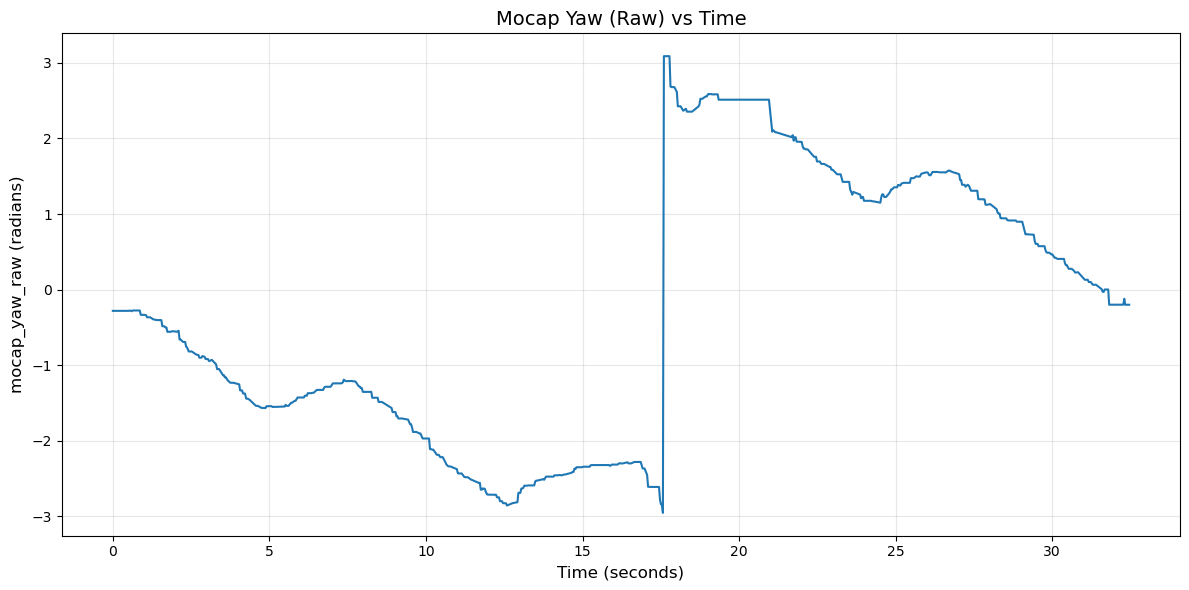

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Timestamp to datetime
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Sort by timestamp to ensure proper ordering
filtered_df = filtered_df.sort_values('Timestamp').reset_index(drop=True)

# Calculate elapsed time in seconds from the first timestamp
start_time = filtered_df['Timestamp'].iloc[0]
filtered_df['elapsed_time'] = (filtered_df['Timestamp'] - start_time).dt.total_seconds()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_heading'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_yaw_raw (radians)', fontsize=12)
plt.title('Mocap Yaw (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()

# # Plot mocap_yaw_raw vs time
# plt.figure(figsize=(12, 6))
# plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_pitch'], linewidth=1.5)
# plt.xlabel('Time (seconds)', fontsize=12)
# plt.ylabel('mocap_pitch (radians)', fontsize=12)
# plt.title('Mocap Pitch (Raw) vs Time', fontsize=14)
# plt.grid(True, alpha=0.3)
# #plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
# plt.tight_layout()
# plt.show()
# # Plot mocap_yaw_raw vs time
# plt.figure(figsize=(12, 6))
# plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_roll'], linewidth=1.5)
# plt.xlabel('Time (seconds)', fontsize=12)
# plt.ylabel('mocap_roll (radians)', fontsize=12)
# plt.title('Mocap Roll (Raw) vs Time', fontsize=14)
# plt.grid(True, alpha=0.3)
# #plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
# plt.tight_layout()
# plt.show()



Loaded 2 waypoints from YAML: [[1, -2], [-1, 2]]


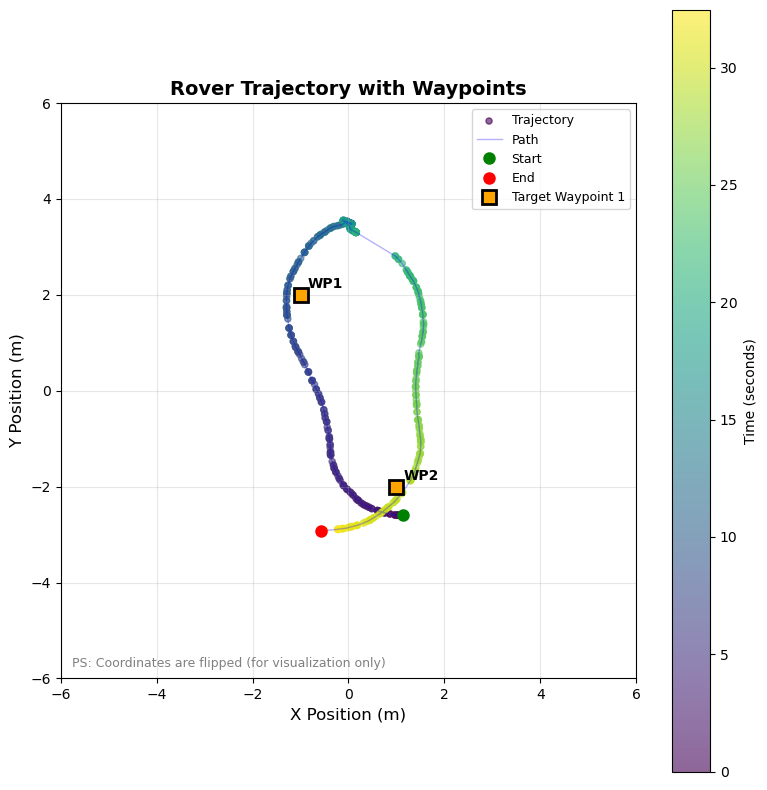


Trajectory Statistics:
  Total distance traveled: 16.84 m
  Start position: (-1.133, 2.595)
  End position: (0.567, 2.926)
  Net displacement: 1.732 m


In [14]:
# ============================================================================
# TRAJECTORY AND WAYPOINT VISUALIZATION
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import yaml
from pathlib import Path

# Load waypoints from YAML file
waypoints_path = Path("../waypoints.yaml")
waypoints_absolute = []
if waypoints_path.exists():
    with open(waypoints_path, 'r') as f:
        waypoints_data = yaml.safe_load(f)
        if 'terrains' in waypoints_data and 'default' in waypoints_data['terrains']:
            waypoints_absolute = waypoints_data['terrains']['default']['waypoints']
            print(f"Loaded {len(waypoints_absolute)} waypoints from YAML: {waypoints_absolute}")
        else:
            print("Warning: Could not find waypoints in YAML file")
else:
    print("Warning: waypoints.yaml not found")



x = -filtered_df['mocap_x']
y = -filtered_df['mocap_y']

# Flip waypoint coordinates
waypoints_vis = [(-wp[0], -wp[1]) for wp in waypoints_absolute]



fig, ax = plt.subplots(figsize=(8, 8))

# Plot trajectory with color gradient based on time
trajectory = ax.scatter(x, y, 
                        c=filtered_df['elapsed_time'], cmap='viridis',
                        s=20, alpha=0.6, label='Trajectory')
plt.colorbar(trajectory, ax=ax, label='Time (seconds)')

# Plot trajectory line
ax.plot(x, y, 
        'b-', alpha=0.3, linewidth=1, label='Path')

# Plot start position
ax.plot(x.iloc[0], y.iloc[0], 
        'go', markersize=8, label='Start', zorder=5)

# Plot end position
ax.plot(x.iloc[-1], y.iloc[-1], 
        'ro', markersize=8, label='End', zorder=5)

# Plot waypoints from YAML (if available)
if waypoints_absolute:
    for i, wp in enumerate(waypoints_vis):
        ax.plot(wp[0], wp[1], 's', color='orange', markersize=10,
                markeredgecolor='black', markeredgewidth=2,
                label=f'Target Waypoint {i+1}' if i == 0 else '', zorder=6)
        ax.annotate(f'WP{i+1}', (wp[0], wp[1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold', color='black')


# Labels, limits, formatting
ax.set_xlabel('X Position (m)', fontsize=12)
ax.set_ylabel('Y Position (m)', fontsize=12)
ax.set_title('Rover Trajectory with Waypoints', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=9)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

# Add a small note about flipping coordinates
ax.text(0.02, 0.02,
        "PS: Coordinates are flipped (for visualization only)",
        transform=ax.transAxes,
        fontsize=9, color='gray')

plt.tight_layout()
plt.show()


# ============================================================================
# Print statistics
# ============================================================================

print(f"\nTrajectory Statistics:")
print(f"  Total distance traveled: {np.sum(np.sqrt(np.diff(filtered_df['mocap_x'])**2 + np.diff(filtered_df['mocap_y'])**2)):.2f} m")
print(f"  Start position: ({filtered_df['mocap_x'].iloc[0]:.3f}, {filtered_df['mocap_y'].iloc[0]:.3f})")
print(f"  End position: ({filtered_df['mocap_x'].iloc[-1]:.3f}, {filtered_df['mocap_y'].iloc[-1]:.3f})")
print(f"  Net displacement: {np.sqrt((filtered_df['mocap_x'].iloc[-1] - filtered_df['mocap_x'].iloc[0])**2 + (filtered_df['mocap_y'].iloc[-1] - filtered_df['mocap_y'].iloc[0])**2):.3f} m")

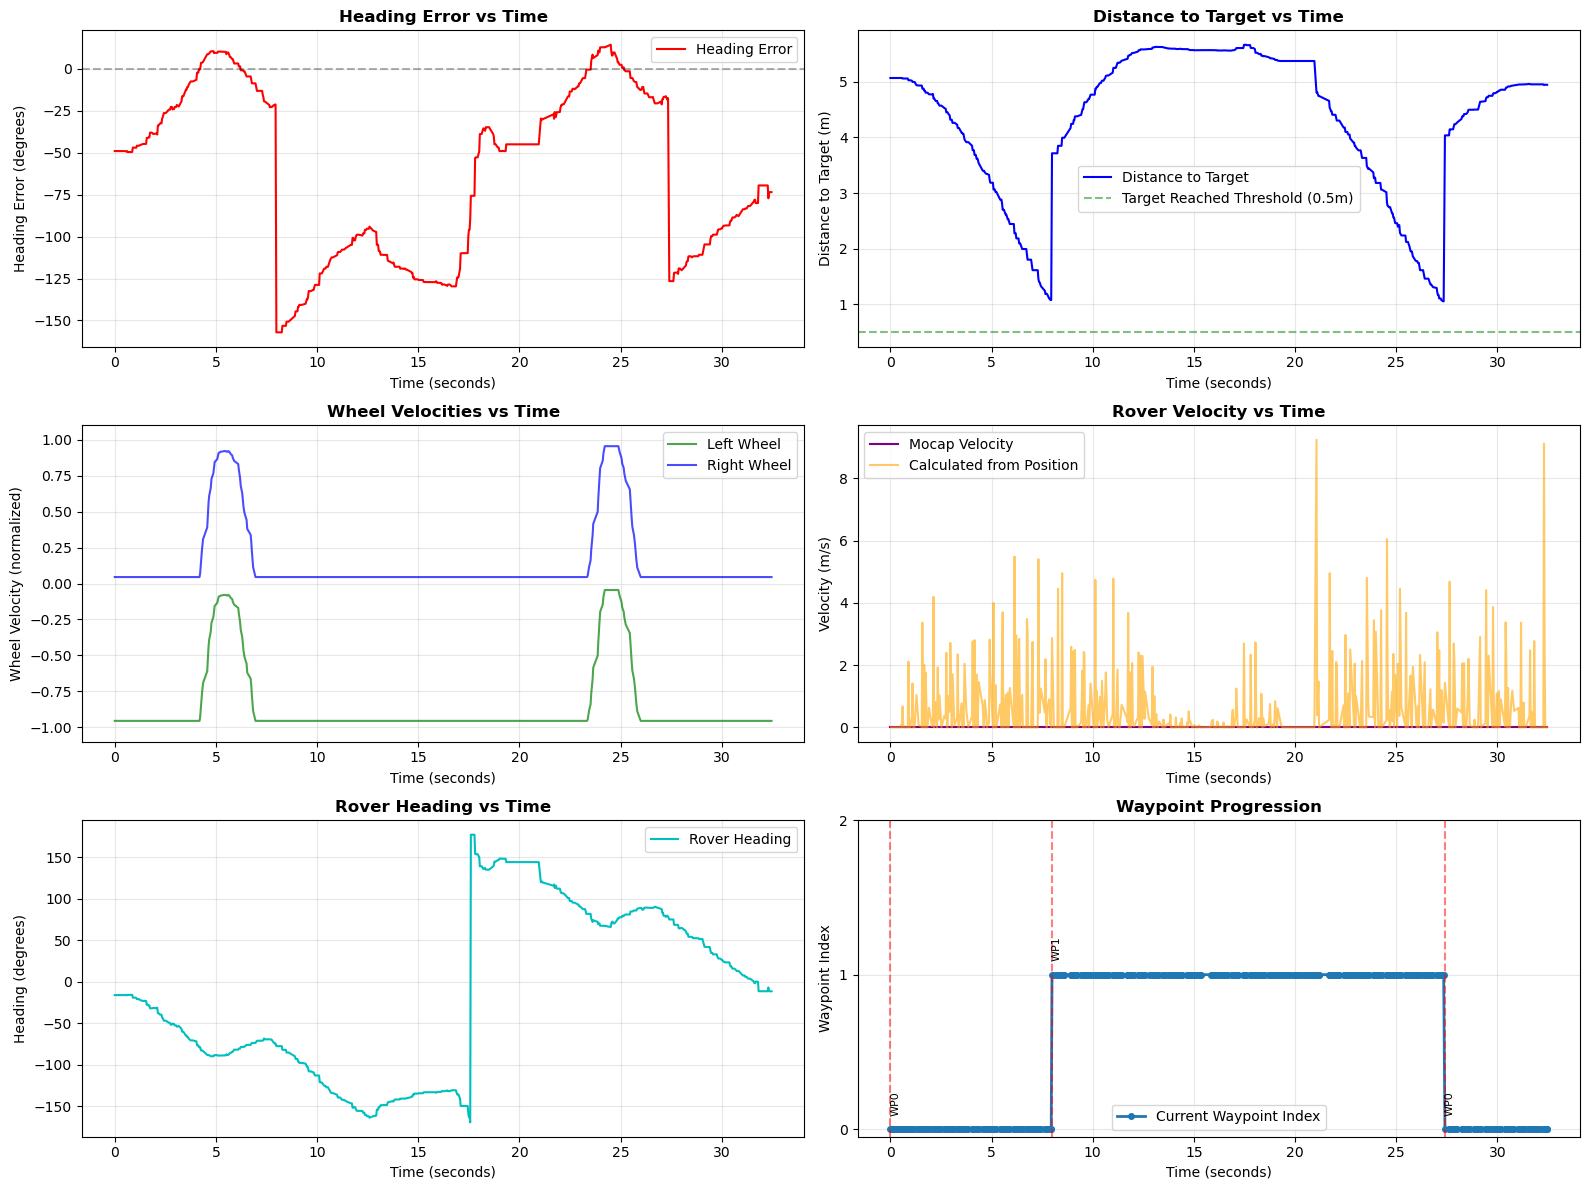


EXPERIMENT STATISTICS
Total experiment duration: 32.46 seconds
Average velocity: 0.000 m/s
Max velocity: 0.000 m/s
Average heading error: 63.01 degrees
Max heading error: 157.08 degrees
Average distance to target: 4.322 m
Min distance to target: 1.056 m
Number of waypoints visited: 2
Waypoint indices: [np.float64(0.0), np.float64(1.0)]


In [15]:
# ============================================================================
# ADDITIONAL ANALYSIS PLOTS
# ============================================================================

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Heading Error over Time
ax1 = plt.subplot(3, 2, 1)
ax1.plot(filtered_df['elapsed_time'], np.degrees(filtered_df['heading_error_rad']), 
         'r-', linewidth=1.5, label='Heading Error')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('Time (seconds)', fontsize=10)
ax1.set_ylabel('Heading Error (degrees)', fontsize=10)
ax1.set_title('Heading Error vs Time', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Distance to Target over Time
ax2 = plt.subplot(3, 2, 2)
ax2.plot(filtered_df['elapsed_time'], filtered_df['distance_to_target'], 
         'b-', linewidth=1.5, label='Distance to Target')
ax2.axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Target Reached Threshold (0.5m)')
ax2.set_xlabel('Time (seconds)', fontsize=10)
ax2.set_ylabel('Distance to Target (m)', fontsize=10)
ax2.set_title('Distance to Target vs Time', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Wheel Velocities
ax3 = plt.subplot(3, 2, 3)
ax3.plot(filtered_df['elapsed_time'], filtered_df['left_wheel_vel'], 
         'g-', linewidth=1.5, label='Left Wheel', alpha=0.7)
ax3.plot(filtered_df['elapsed_time'], filtered_df['right_wheel_vel'], 
         'b-', linewidth=1.5, label='Right Wheel', alpha=0.7)
ax3.set_xlabel('Time (seconds)', fontsize=10)
ax3.set_ylabel('Wheel Velocity (normalized)', fontsize=10)
ax3.set_title('Wheel Velocities vs Time', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_ylim([-1.1, 1.1])

# 4. Rover Velocity
ax4 = plt.subplot(3, 2, 4)
ax4.plot(filtered_df['elapsed_time'], filtered_df['mocap_velocity'], 
         'purple', linewidth=1.5, label='Mocap Velocity')
# Calculate velocity from position if available
if len(filtered_df) > 1:
    dt = np.diff(filtered_df['elapsed_time'])
    dx = np.diff(filtered_df['mocap_x'])
    dy = np.diff(filtered_df['mocap_y'])
    calculated_velocity = np.sqrt(dx**2 + dy**2) / (dt + 1e-6)  # Avoid division by zero
    ax4.plot(filtered_df['elapsed_time'].iloc[1:], calculated_velocity, 
             'orange', linewidth=1.5, alpha=0.6, label='Calculated from Position')
ax4.set_xlabel('Time (seconds)', fontsize=10)
ax4.set_ylabel('Velocity (m/s)', fontsize=10)
ax4.set_title('Rover Velocity vs Time', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# 5. Heading (Yaw) over Time
ax5 = plt.subplot(3, 2, 5)
ax5.plot(filtered_df['elapsed_time'], np.degrees(filtered_df['mocap_heading']), 
         'c-', linewidth=1.5, label='Rover Heading')
ax5.set_xlabel('Time (seconds)', fontsize=10)
ax5.set_ylabel('Heading (degrees)', fontsize=10)
ax5.set_title('Rover Heading vs Time', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend()

# 6. Waypoint Progression
ax6 = plt.subplot(3, 2, 6)
waypoint_changes = filtered_df['current_waypoint_idx'].diff() != 0
waypoint_change_times = filtered_df.loc[waypoint_changes, 'elapsed_time']
waypoint_change_indices = filtered_df.loc[waypoint_changes, 'current_waypoint_idx']

ax6.plot(filtered_df['elapsed_time'], filtered_df['current_waypoint_idx'], 
         'o-', linewidth=2, markersize=4, label='Current Waypoint Index')
if len(waypoint_change_times) > 0:
    for t, idx in zip(waypoint_change_times, waypoint_change_indices):
        ax6.axvline(x=t, color='r', linestyle='--', alpha=0.5)
        ax6.text(t, idx + 0.1, f'WP{int(idx)}', rotation=90, fontsize=8)
ax6.set_xlabel('Time (seconds)', fontsize=10)
ax6.set_ylabel('Waypoint Index', fontsize=10)
ax6.set_title('Waypoint Progression', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend()
ax6.set_yticks(range(int(filtered_df['current_waypoint_idx'].min()), 
                     int(filtered_df['current_waypoint_idx'].max()) + 2))

plt.tight_layout()
plt.show()

# Print additional statistics
print("\n" + "="*60)
print("EXPERIMENT STATISTICS")
print("="*60)
print(f"Total experiment duration: {filtered_df['elapsed_time'].iloc[-1]:.2f} seconds")
print(f"Average velocity: {filtered_df['mocap_velocity'].mean():.3f} m/s")
print(f"Max velocity: {filtered_df['mocap_velocity'].max():.3f} m/s")
print(f"Average heading error: {np.degrees(np.abs(filtered_df['heading_error_rad'])).mean():.2f} degrees")
print(f"Max heading error: {np.degrees(np.abs(filtered_df['heading_error_rad'])).max():.2f} degrees")
print(f"Average distance to target: {filtered_df['distance_to_target'].mean():.3f} m")
print(f"Min distance to target: {filtered_df['distance_to_target'].min():.3f} m")
print(f"Number of waypoints visited: {len(filtered_df['current_waypoint_idx'].unique())}")
print(f"Waypoint indices: {sorted(filtered_df['current_waypoint_idx'].unique())}")



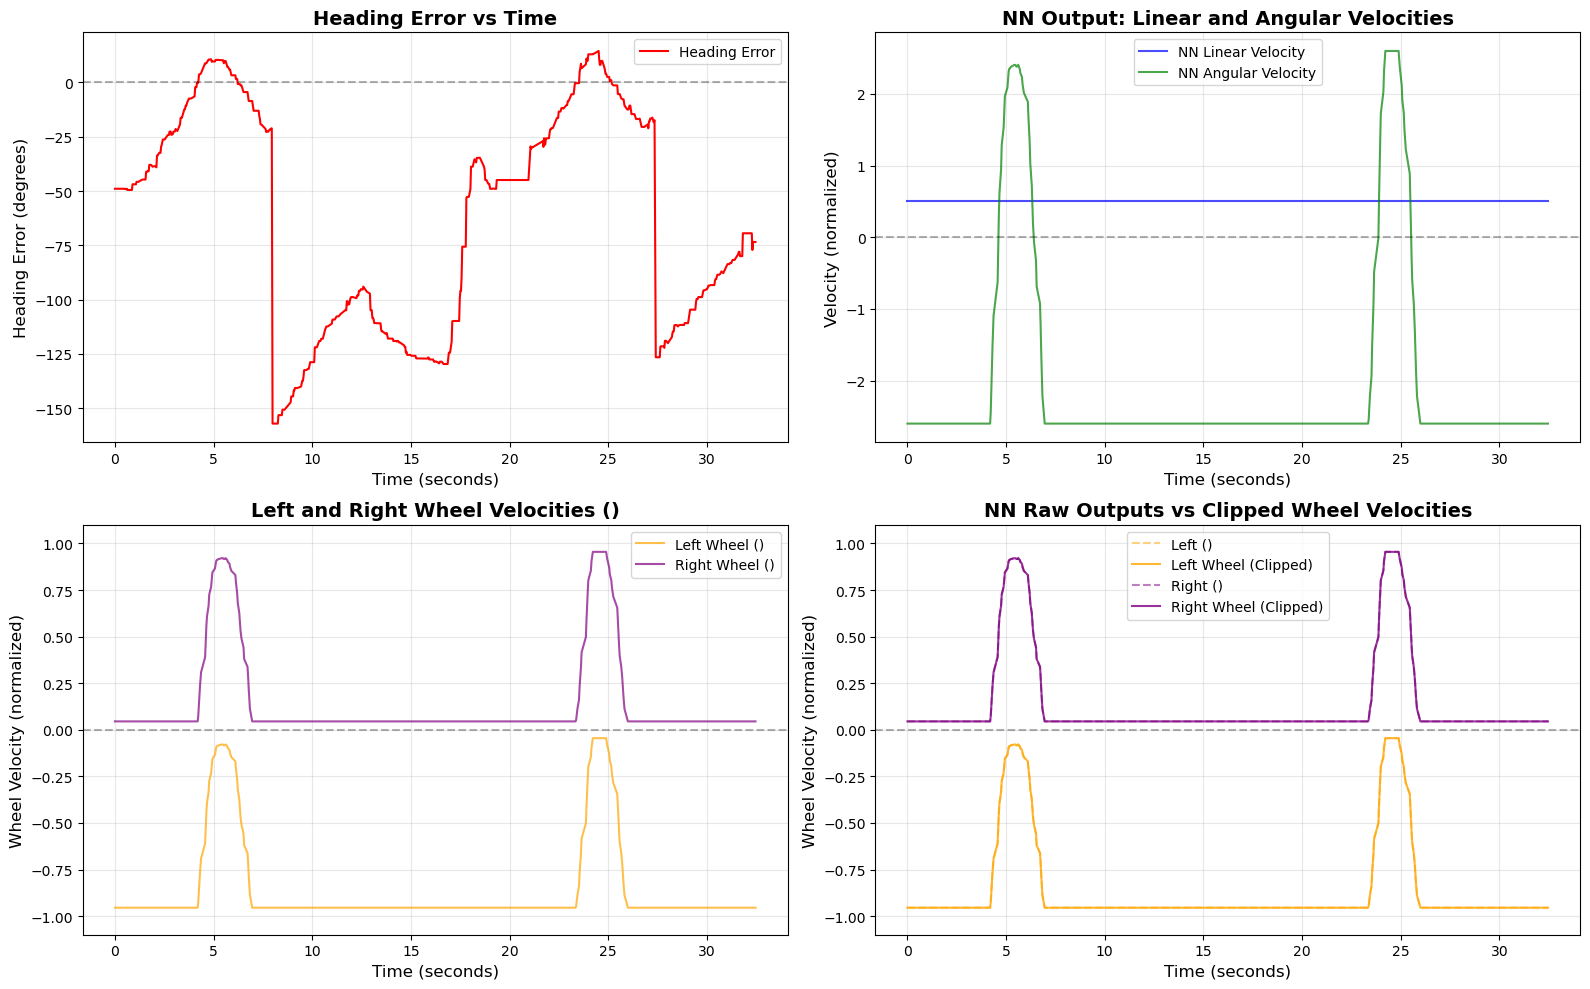


HEADING ERROR AND NN OUTPUT STATISTICS
Average heading error: 63.01 degrees
Max heading error: 157.08 degrees
RMS heading error: 78.85 degrees

NN Output Statistics:
  Linear velocity - Mean: 0.500, Std: 0.000
  Angular velocity - Mean: -2.055, Std: 1.422
  Left wheel (clipped) - Mean: -0.860, Std: 0.249
  Right wheel (clipped) - Mean: 0.140, Std: 0.249


In [16]:
# ============================================================================
# HEADING ERROR AND NN OUTPUT PLOTS
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# 1. Heading Error vs Time
ax1 = plt.subplot(2, 2, 1)
ax1.plot(filtered_df['elapsed_time'], np.degrees(filtered_df['heading_error_rad']), 
         'r-', linewidth=1.5, label='Heading Error')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Heading Error (degrees)', fontsize=12)
ax1.set_title('Heading Error vs Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. NN Outputs: Linear and Angular Velocities
ax2 = plt.subplot(2, 2, 2)
ax2.plot(filtered_df['elapsed_time'], filtered_df['nn_v_linear'], 
         'b-', linewidth=1.5, label='NN Linear Velocity', alpha=0.7)
ax2.plot(filtered_df['elapsed_time'], filtered_df['nn_v_angular'], 
         'g-', linewidth=1.5, label='NN Angular Velocity', alpha=0.7)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Velocity (normalized)', fontsize=12)
ax2.set_title('NN Output: Linear and Angular Velocities', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. NN Outputs: Left and Right Wheel Velocities (Raw)
ax3 = plt.subplot(2, 2, 3)
ax3.plot(filtered_df['elapsed_time'], filtered_df['left_wheel_vel'], 
         'orange', linewidth=1.5, label='Left Wheel ()', alpha=0.7)
ax3.plot(filtered_df['elapsed_time'], filtered_df['right_wheel_vel'], 
         'purple', linewidth=1.5, label='Right Wheel ()', alpha=0.7)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax3.set_xlabel('Time (seconds)', fontsize=12)
ax3.set_ylabel('Wheel Velocity (normalized)', fontsize=12)
ax3.set_title('Left and Right Wheel Velocities ()', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_ylim([-1.1, 1.1])

# 4. Comparison: Raw NN Outputs vs Clipped Wheel Velocities
ax4 = plt.subplot(2, 2, 4)
ax4.plot(filtered_df['elapsed_time'], filtered_df['left_wheel_vel'], 
         'orange', linewidth=1.5, label='Left ()', alpha=0.5, linestyle='--')
ax4.plot(filtered_df['elapsed_time'], filtered_df['left_wheel_vel'], 
         'orange', linewidth=1.5, label='Left Wheel (Clipped)', alpha=0.8)
ax4.plot(filtered_df['elapsed_time'], filtered_df['right_wheel_vel'], 
         'purple', linewidth=1.5, label='Right ()', alpha=0.5, linestyle='--')
ax4.plot(filtered_df['elapsed_time'], filtered_df['right_wheel_vel'], 
         'purple', linewidth=1.5, label='Right Wheel (Clipped)', alpha=0.8)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax4.set_xlabel('Time (seconds)', fontsize=12)
ax4.set_ylabel('Wheel Velocity (normalized)', fontsize=12)
ax4.set_title('NN Raw Outputs vs Clipped Wheel Velocities', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()
ax4.set_ylim([-1.1, 1.1])

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*60)
print("HEADING ERROR AND NN OUTPUT STATISTICS")
print("="*60)
print(f"Average heading error: {np.degrees(np.abs(filtered_df['heading_error_rad'])).mean():.2f} degrees")
print(f"Max heading error: {np.degrees(np.abs(filtered_df['heading_error_rad'])).max():.2f} degrees")
print(f"RMS heading error: {np.degrees(np.sqrt(np.mean(filtered_df['heading_error_rad']**2))):.2f} degrees")
print(f"\nNN Output Statistics:")
print(f"  Linear velocity - Mean: {filtered_df['nn_v_linear'].mean():.3f}, Std: {filtered_df['nn_v_linear'].std():.3f}")
print(f"  Angular velocity - Mean: {filtered_df['nn_v_angular'].mean():.3f}, Std: {filtered_df['nn_v_angular'].std():.3f}")
print(f"  Left wheel (clipped) - Mean: {filtered_df['left_wheel_vel'].mean():.3f}, Std: {filtered_df['left_wheel_vel'].std():.3f}")
print(f"  Right wheel (clipped) - Mean: {filtered_df['right_wheel_vel'].mean():.3f}, Std: {filtered_df['right_wheel_vel'].std():.3f}")
